<a href="https://colab.research.google.com/github/DheniMoura/Somando-as-faces-de-dados/blob/main/Soma_faces_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Dhenifer M. 
RU: 452947

Imagem 1 
Soma das faces das bolinhas: 11


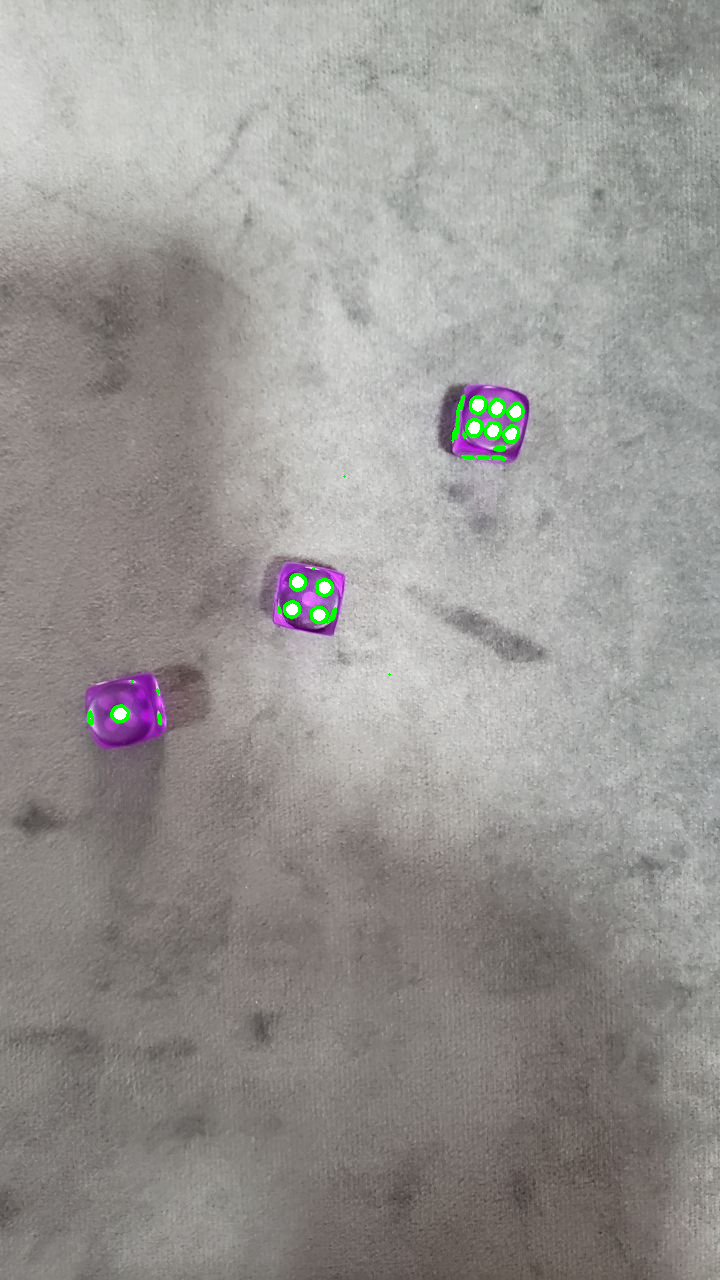


Imagem 2 
Soma das faces das bolinhas: 4


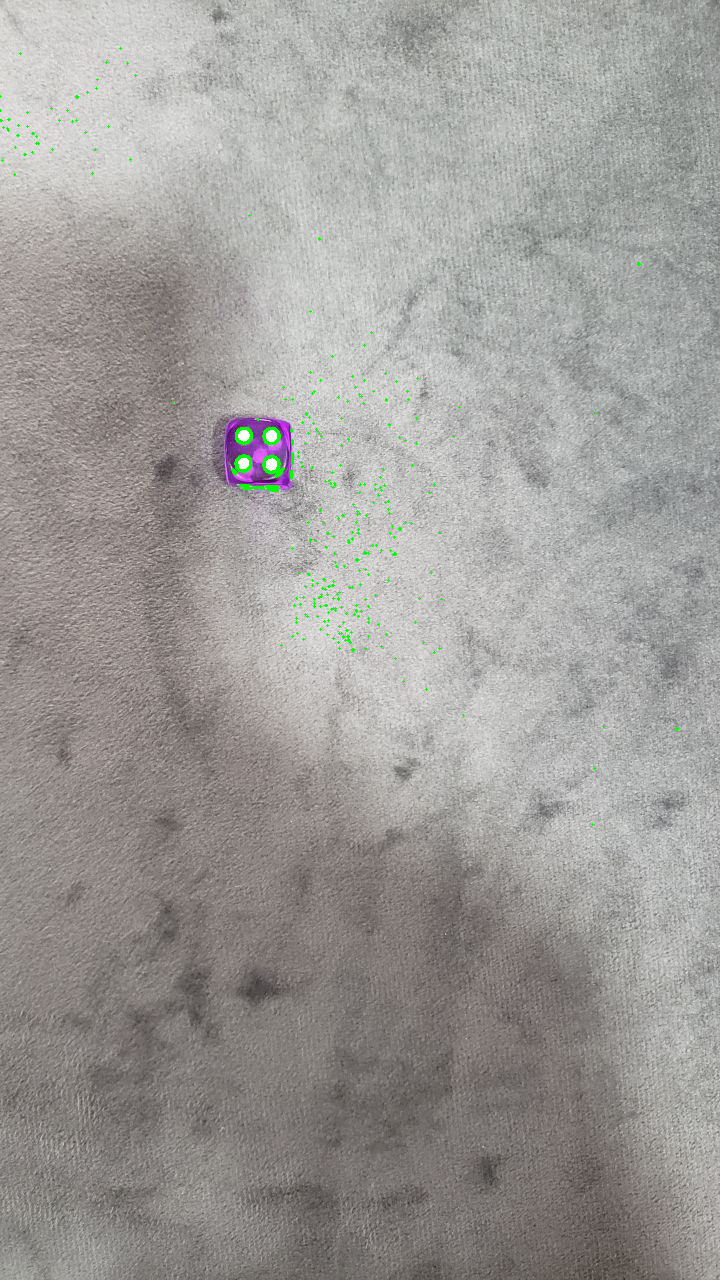


Imagem 3 
Soma das faces das bolinhas: 15


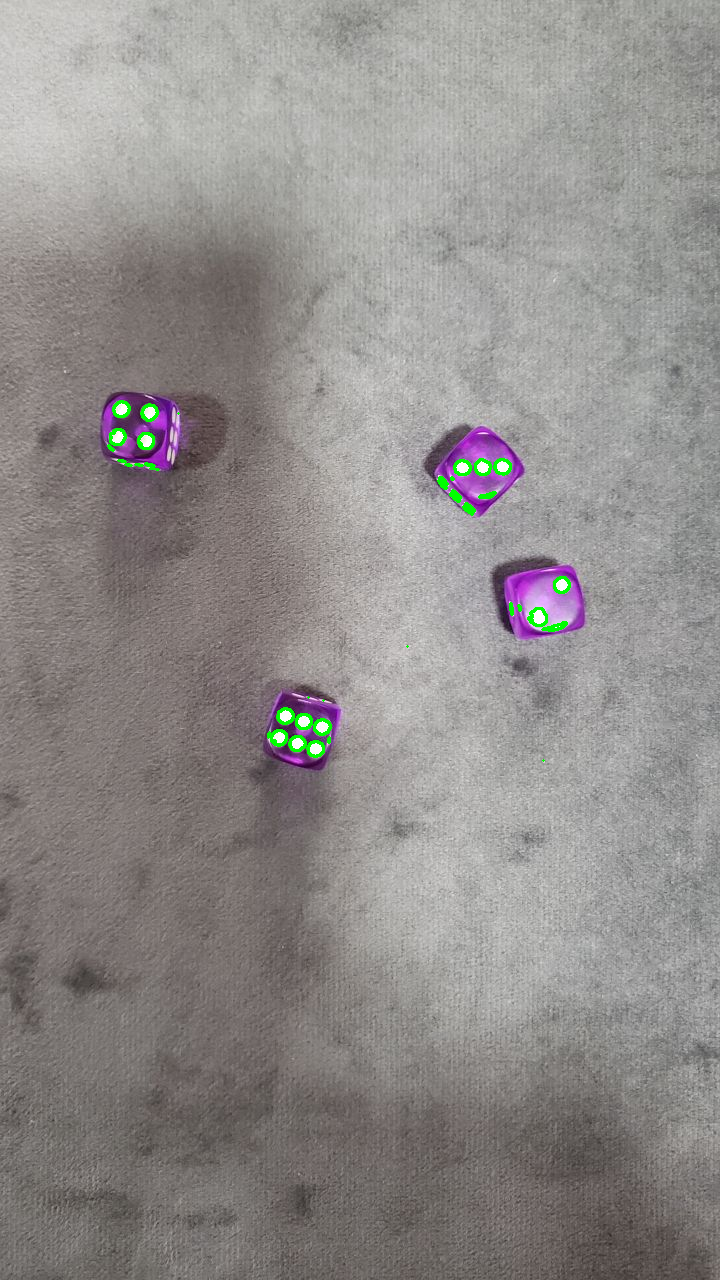


Imagem 4 
Soma das faces das bolinhas: 7


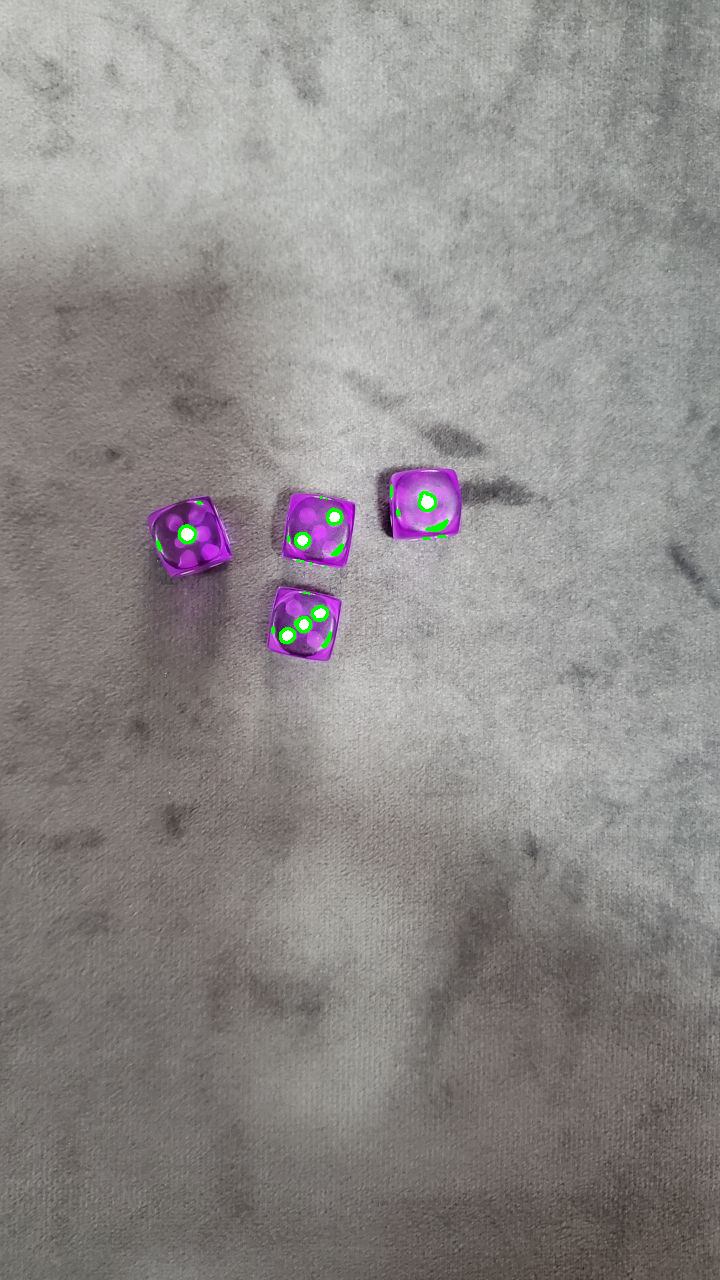

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow #Imprimindo imagens
import glob #Lendo várias imagens dentro de uma pasta

caminho_imagens = '/imagensDados/*.jpg'


def soma_faces(imagem):

  #Convertendo a imagem para escala de cinza
  imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

  #Filtro de Laplace
  img_laplace = cv2.Laplacian(imagem_cinza, cv2.CV_8U)
  imagem_cinza_sem_reflexo = cv2.subtract(imagem_cinza, img_laplace)

  #Convertendo a imagem para binária
  _, imagem_binaria = cv2.threshold(imagem_cinza_sem_reflexo, 230, 255, cv2.THRESH_BINARY)

  #Encontrando contornos na imagem binária
  modo = cv2.RETR_EXTERNAL
  metodo = cv2.CHAIN_APPROX_SIMPLE
  contornos, _ = cv2.findContours(imagem_binaria, modo, metodo)

  soma_faces = 0
  area_minima_contornos = 100

  #Percorrendo os contornos encontrados
  for contorno in contornos:
      #Calculanado a área do contorno
      area_contorno = cv2.contourArea(contorno)

      #Verificando se o contorno tem uma área mínima
      if area_contorno > area_minima_contornos:
          soma_faces += 1

  #Exibindo a soma das faces das bolinhas
  print("\nImagem", num, "\nSoma das faces das bolinhas:", soma_faces)

  #Desenhando os contornos de todas as bolinhas encontradas na imagem original
  imagem_contornos = imagem.copy()
  cv2.drawContours(imagem_contornos, contornos, -1, (0, 255, 0), 2)
  cv2_imshow(imagem_contornos)


num = 0
for nome in glob.glob(caminho_imagens):
  num +=1
  img = cv2.imread(nome)
  soma_faces(img)
